In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
import os
import pickle

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


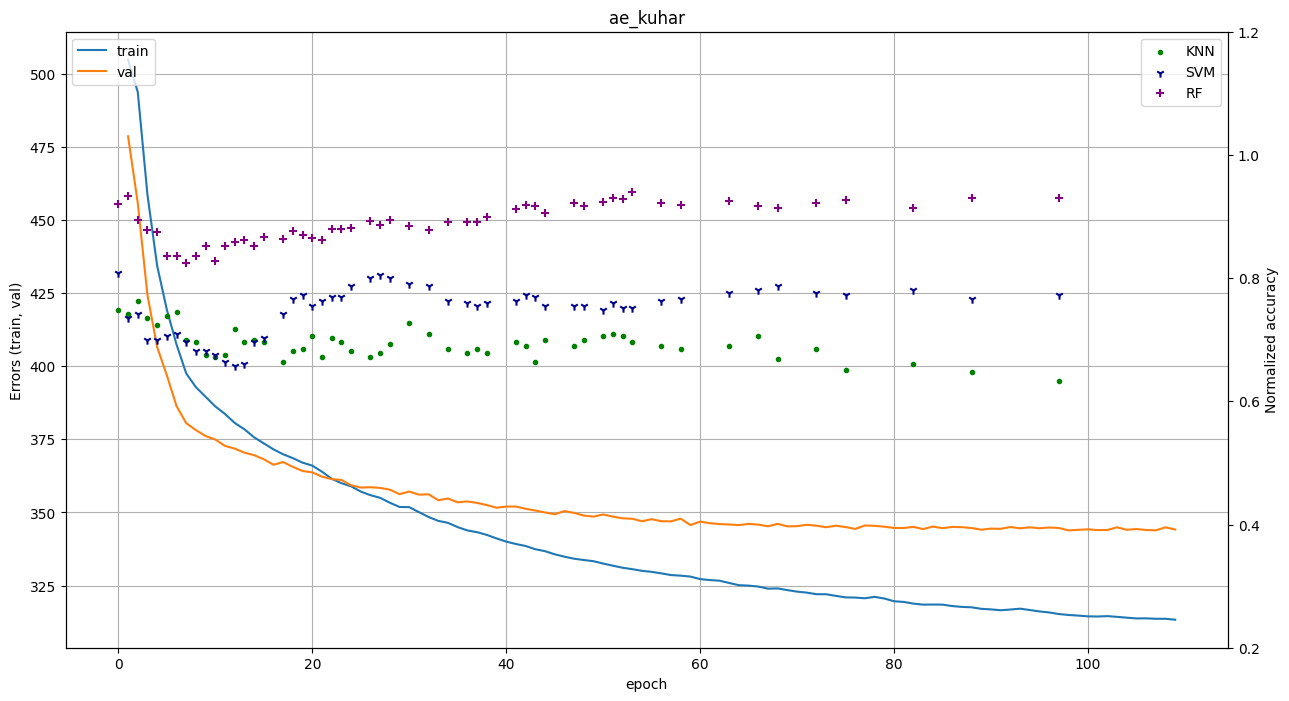

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


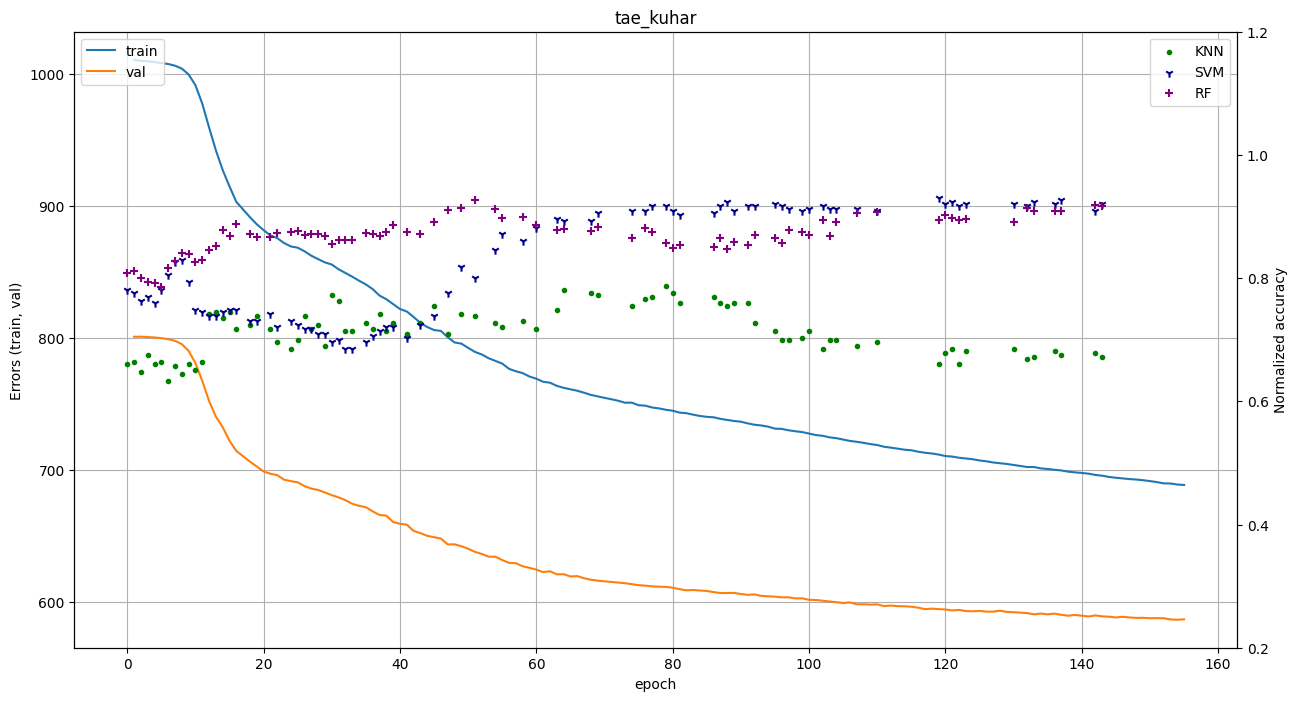

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


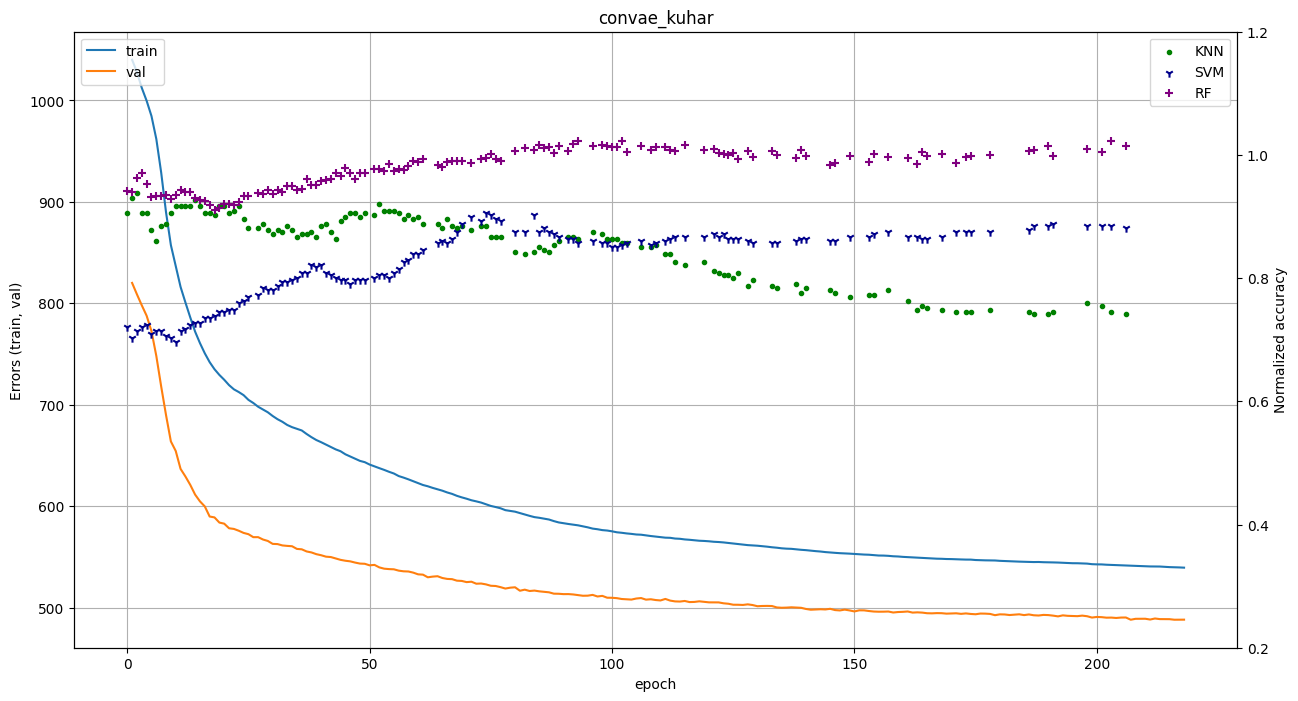

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


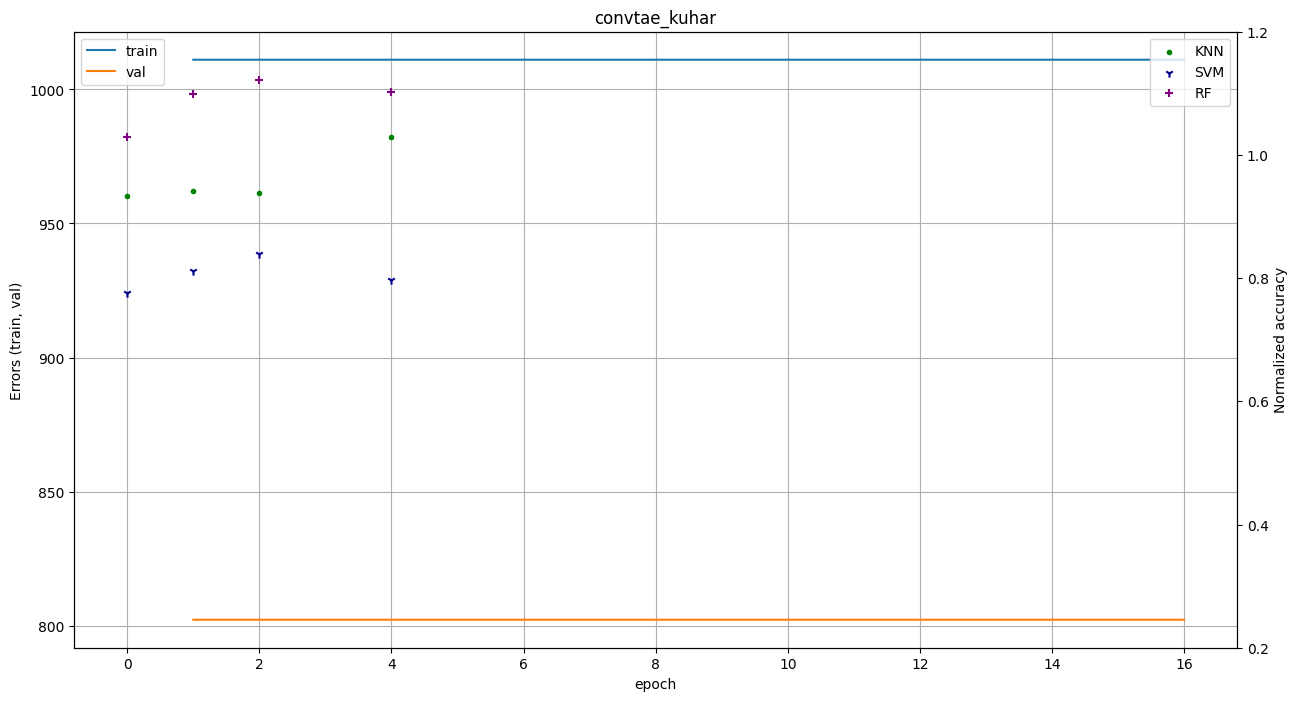

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


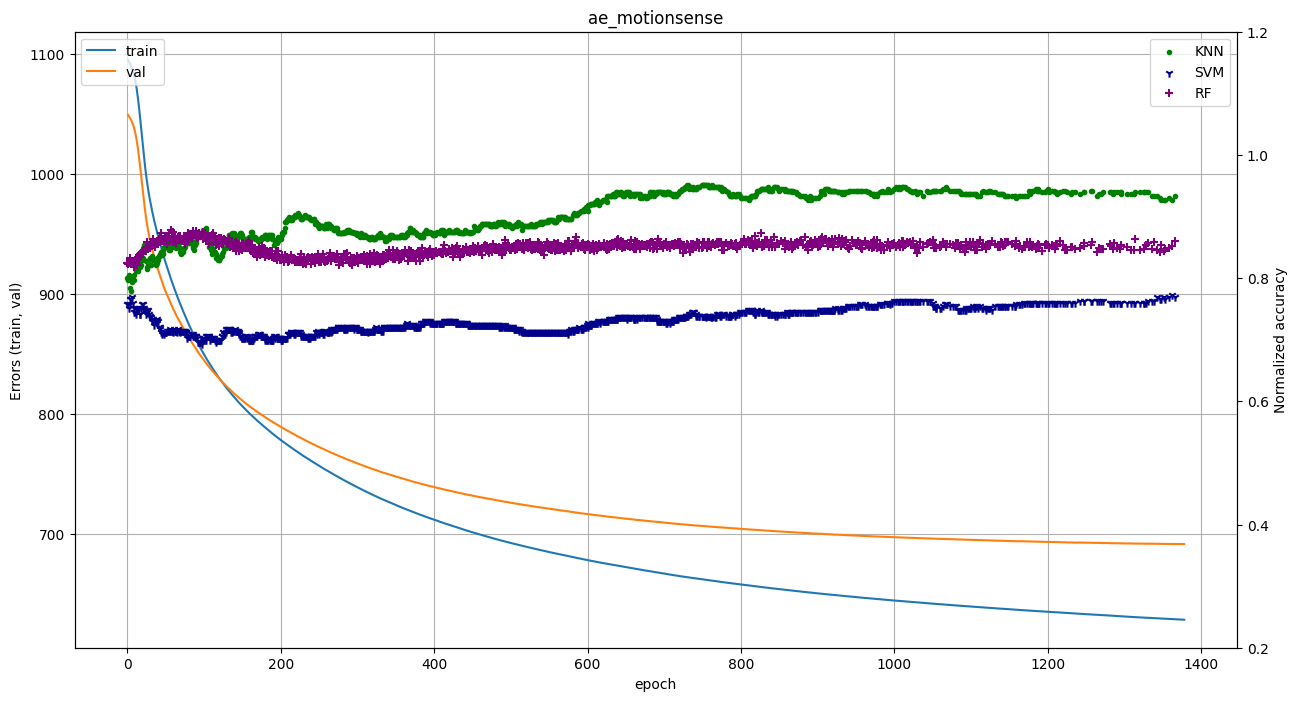

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


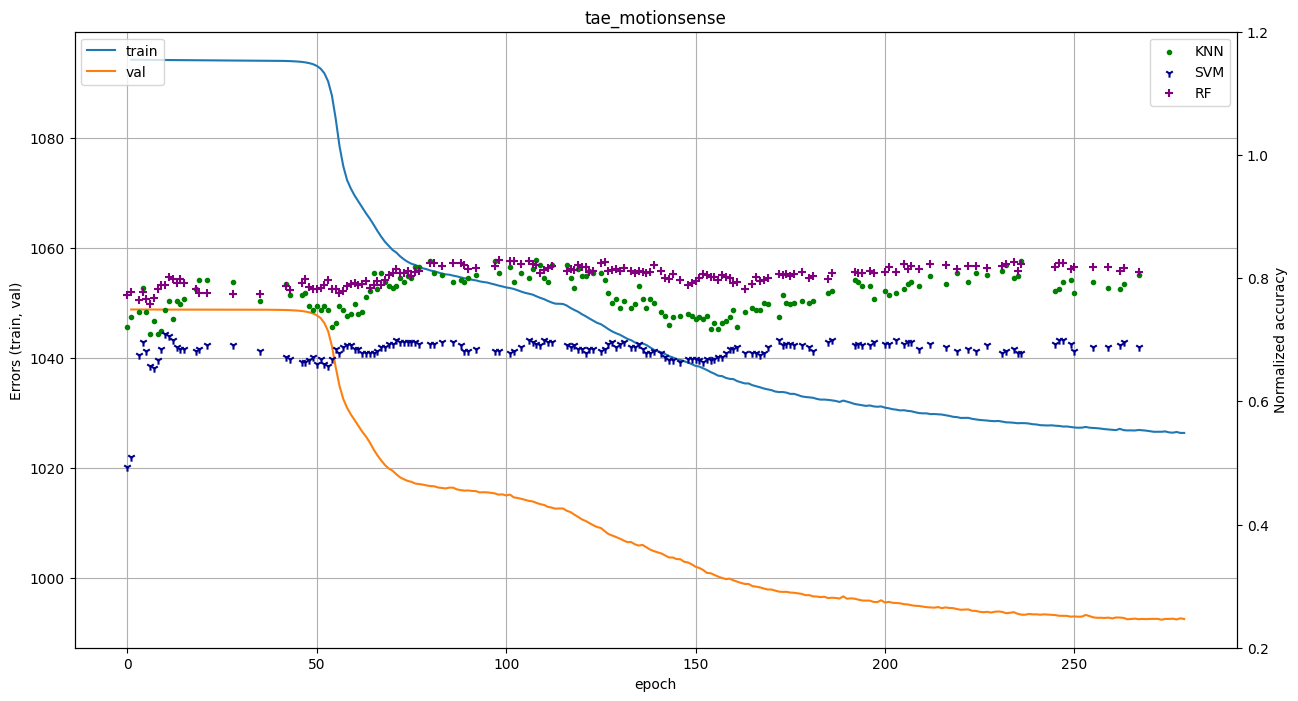

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


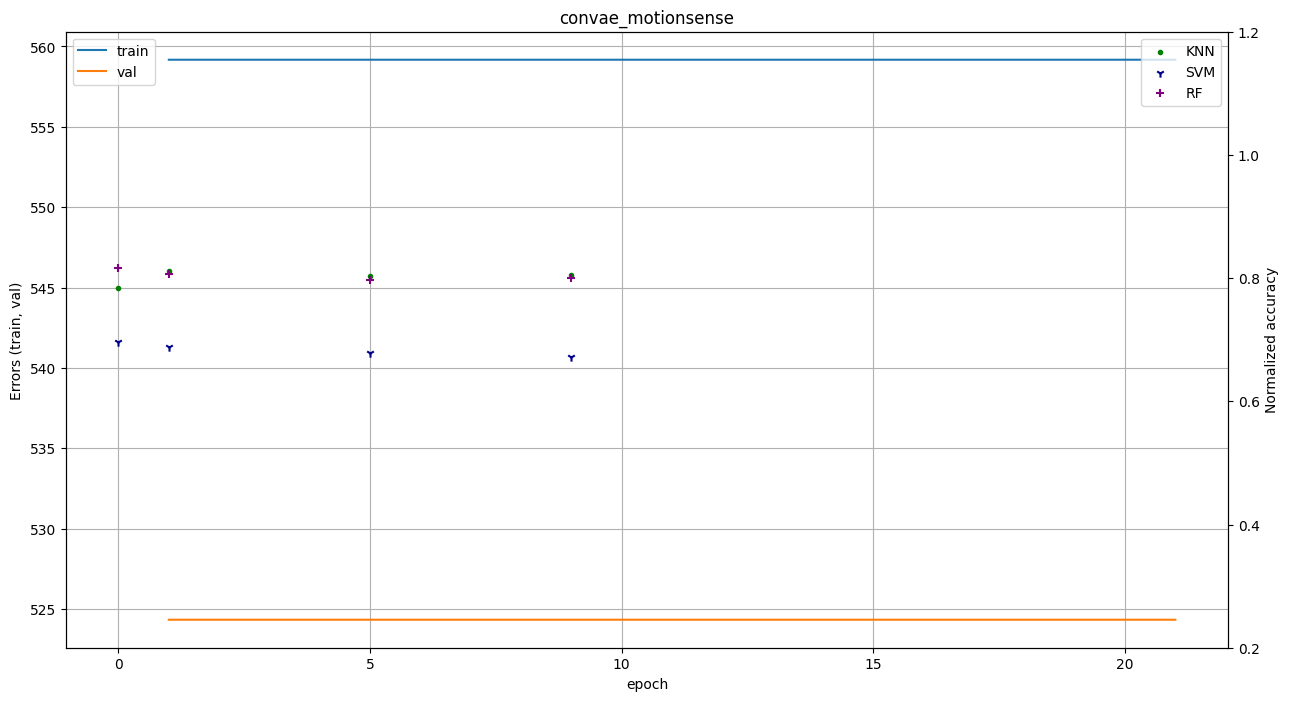

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


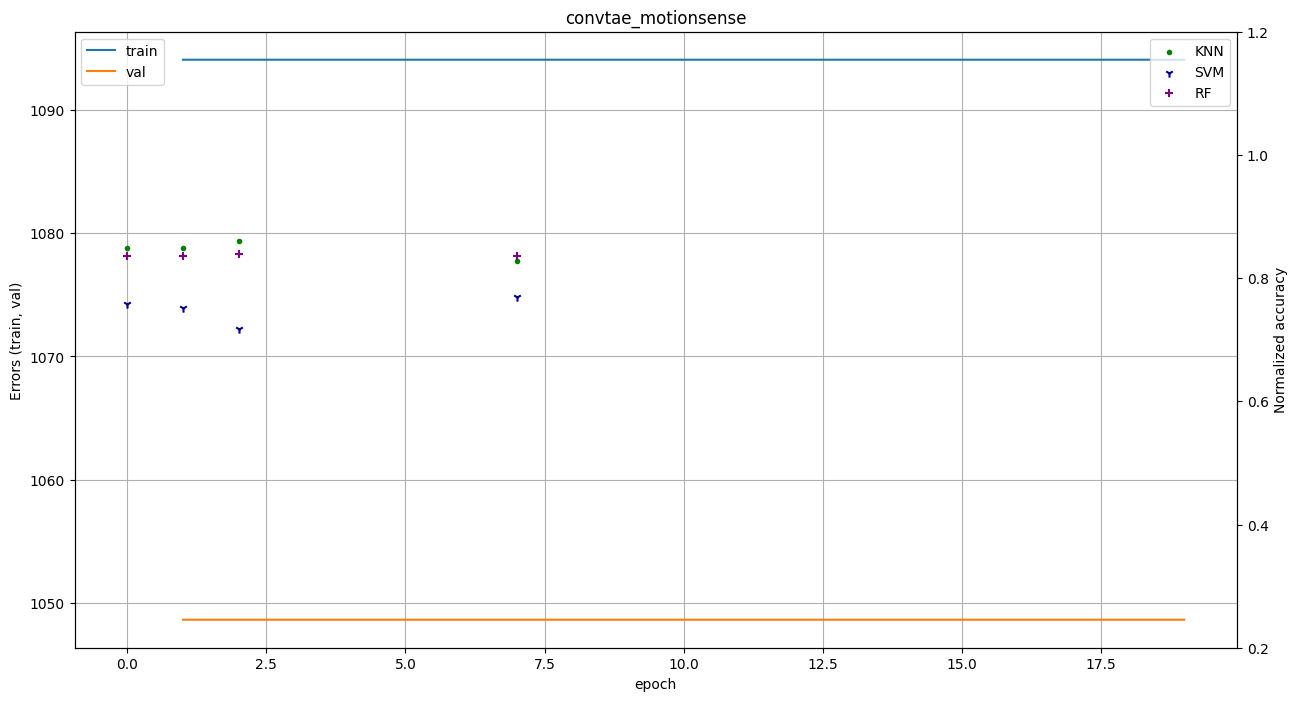

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


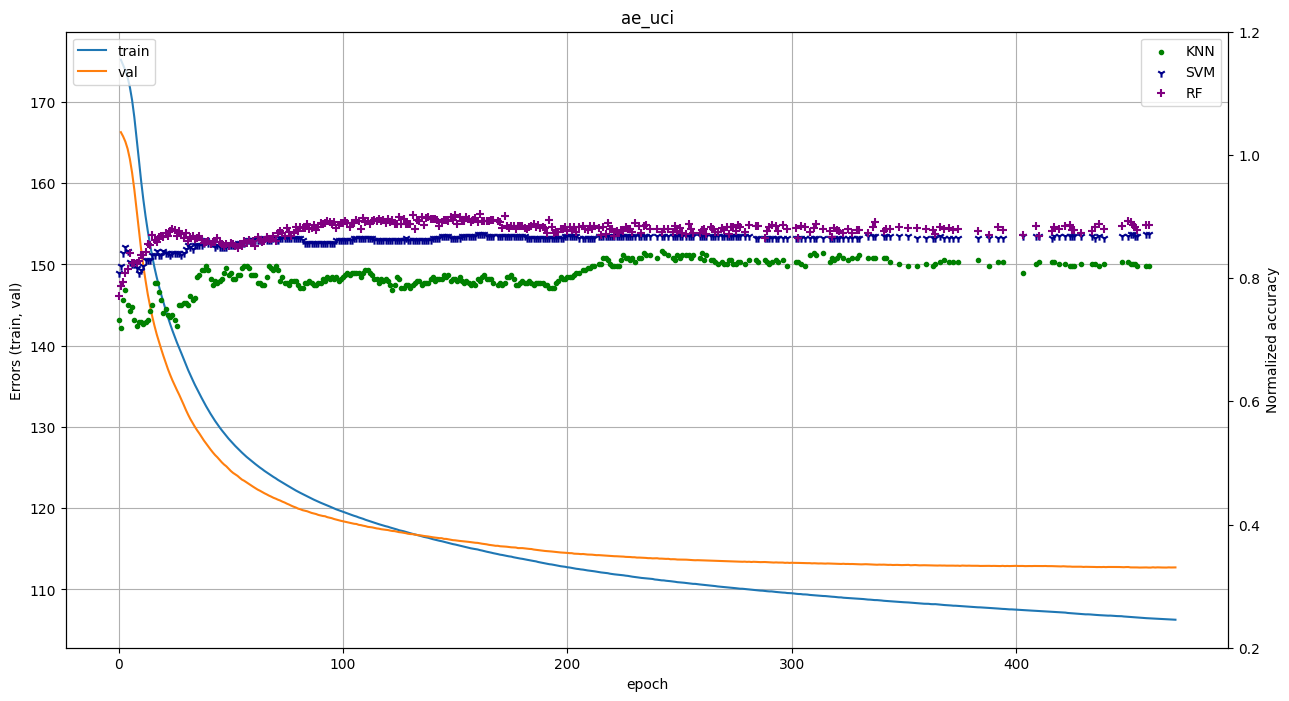

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


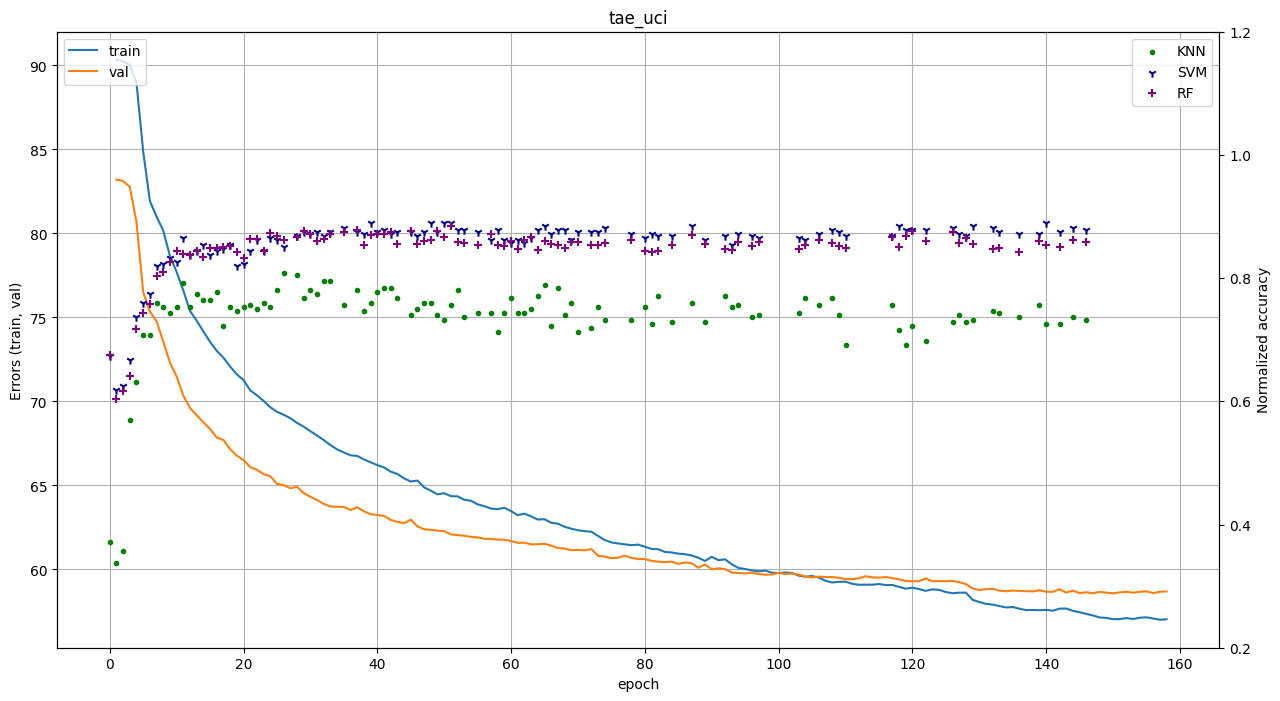

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


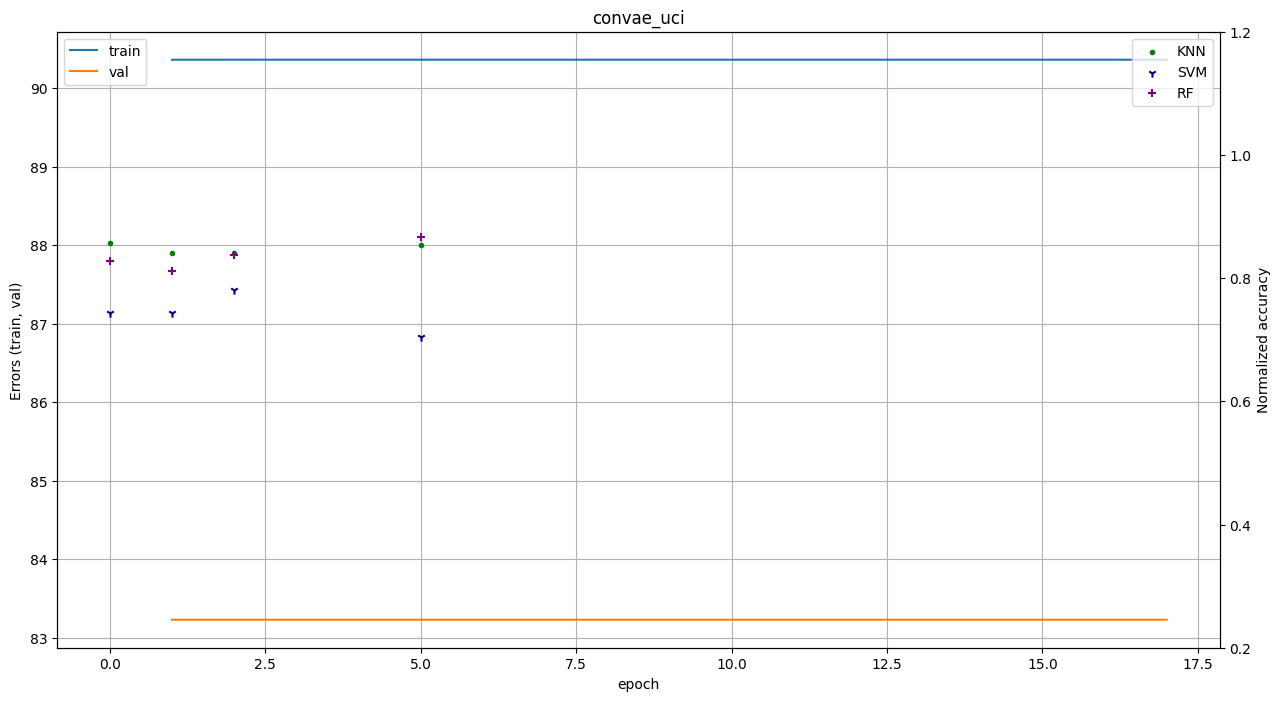

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


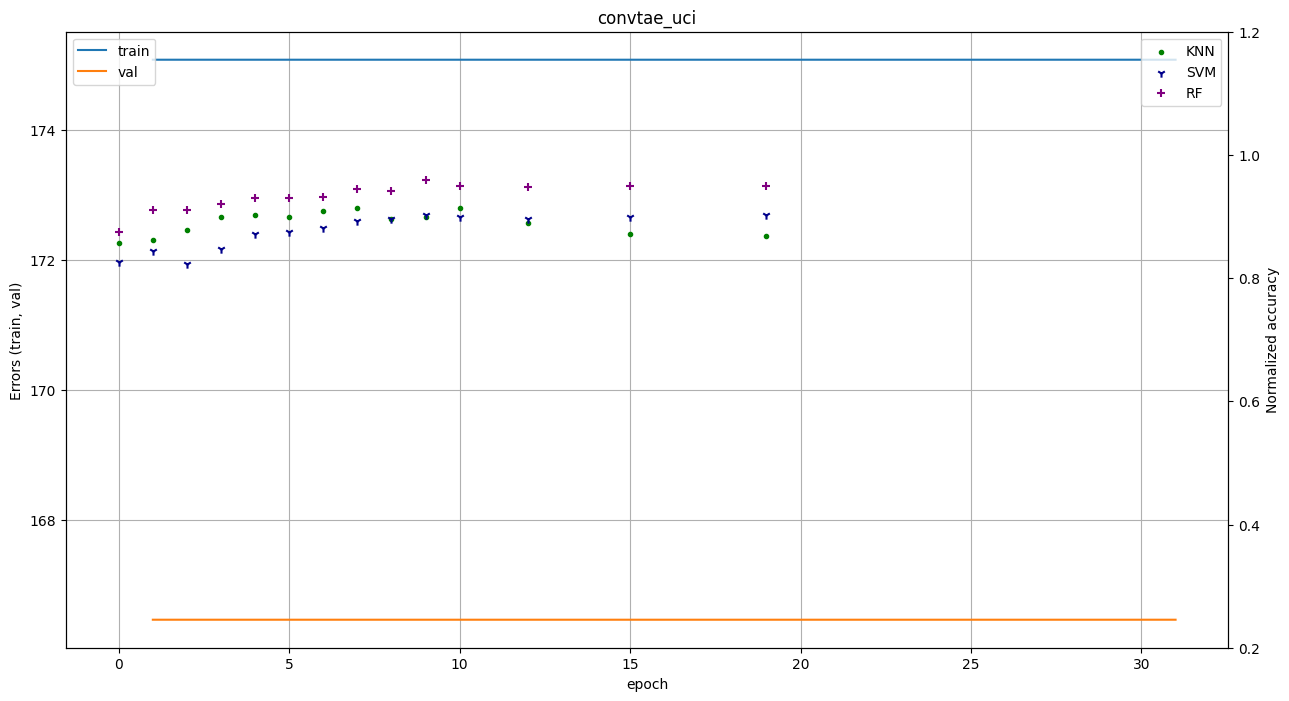

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


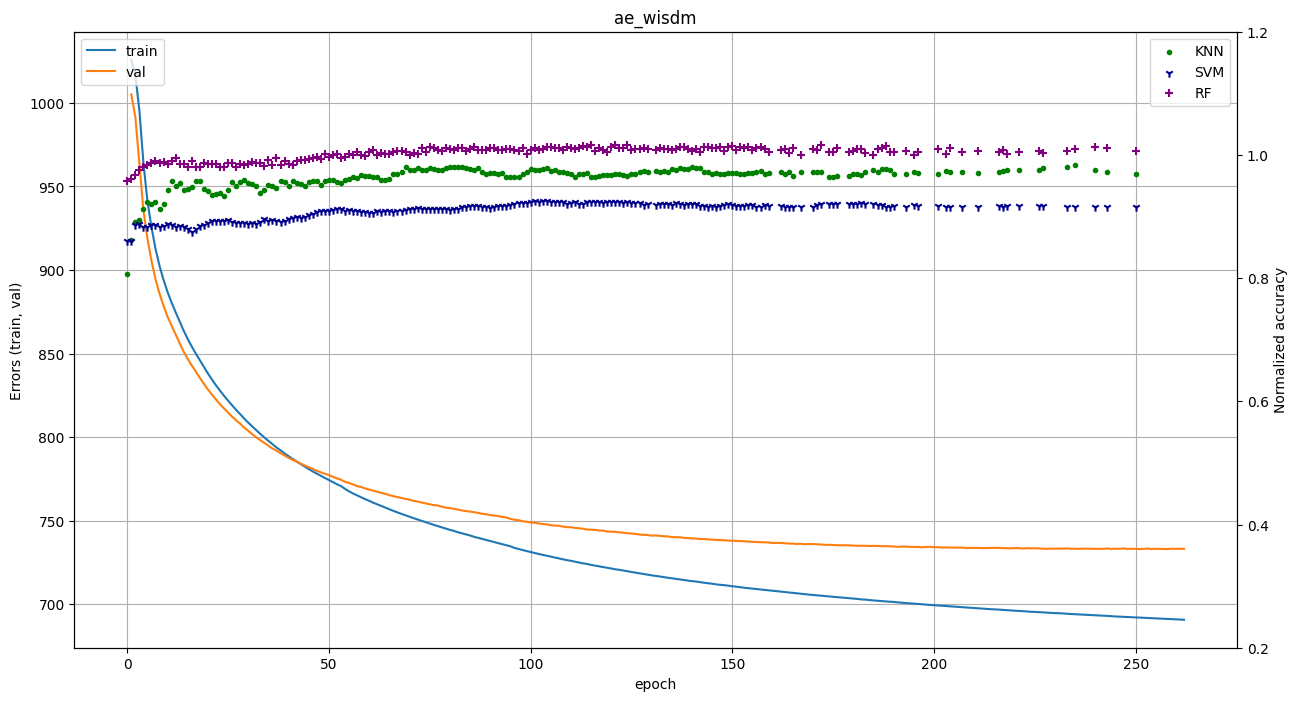

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


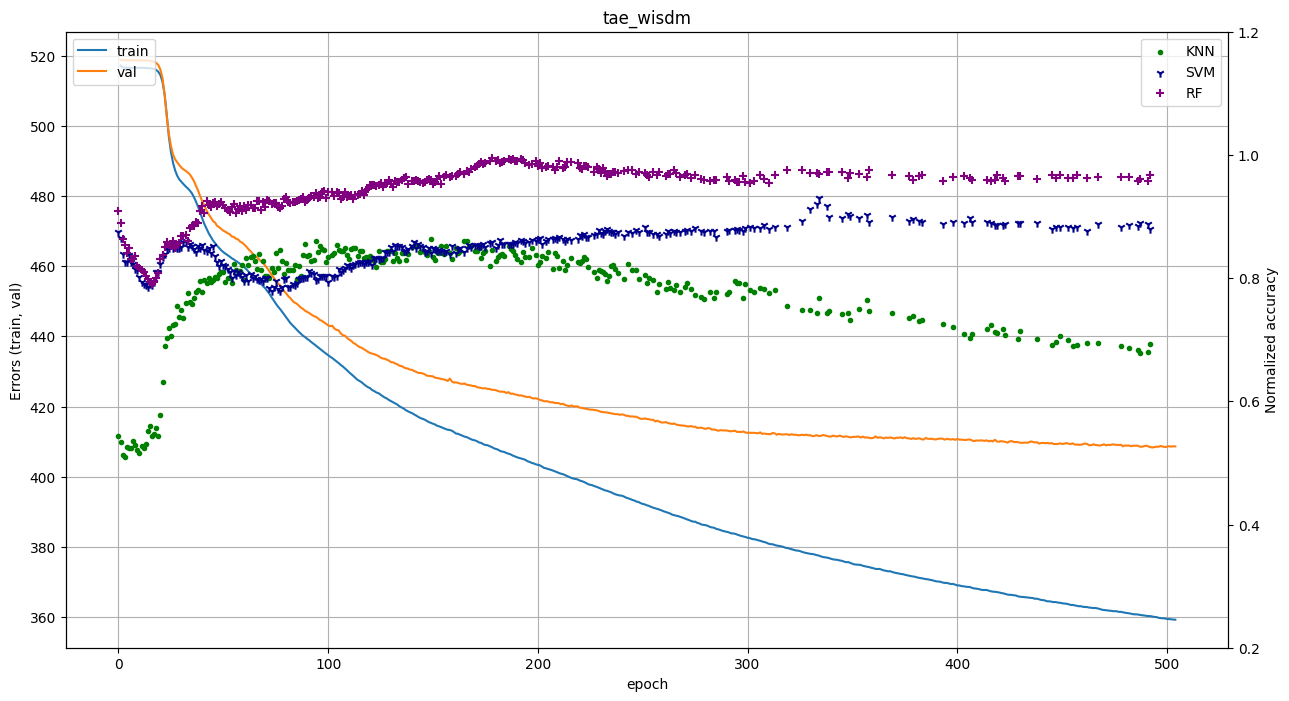

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


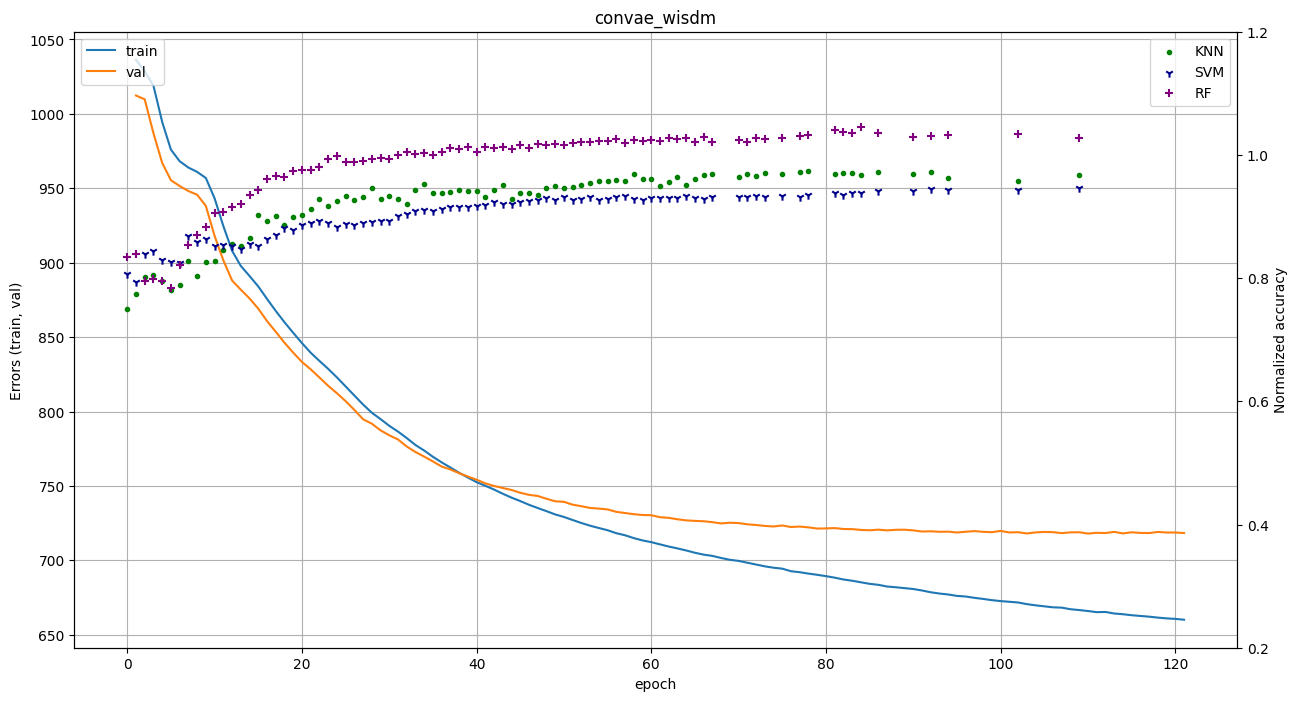

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


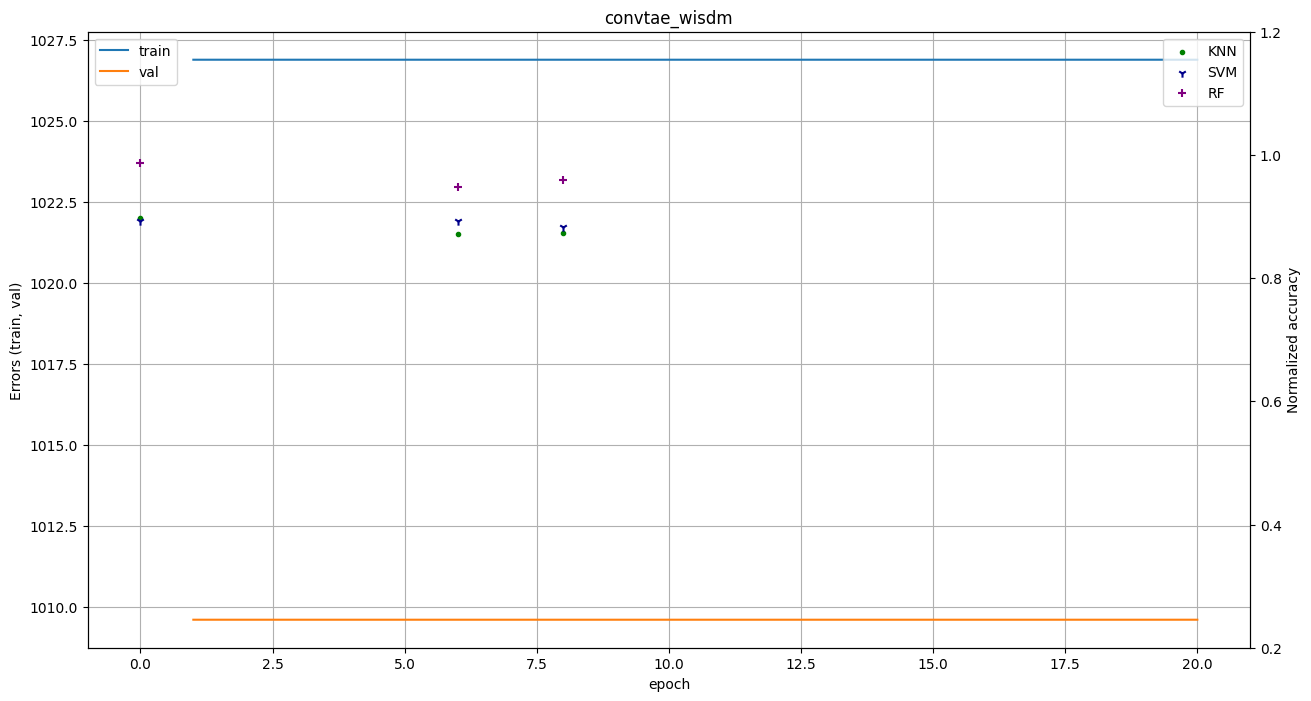

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


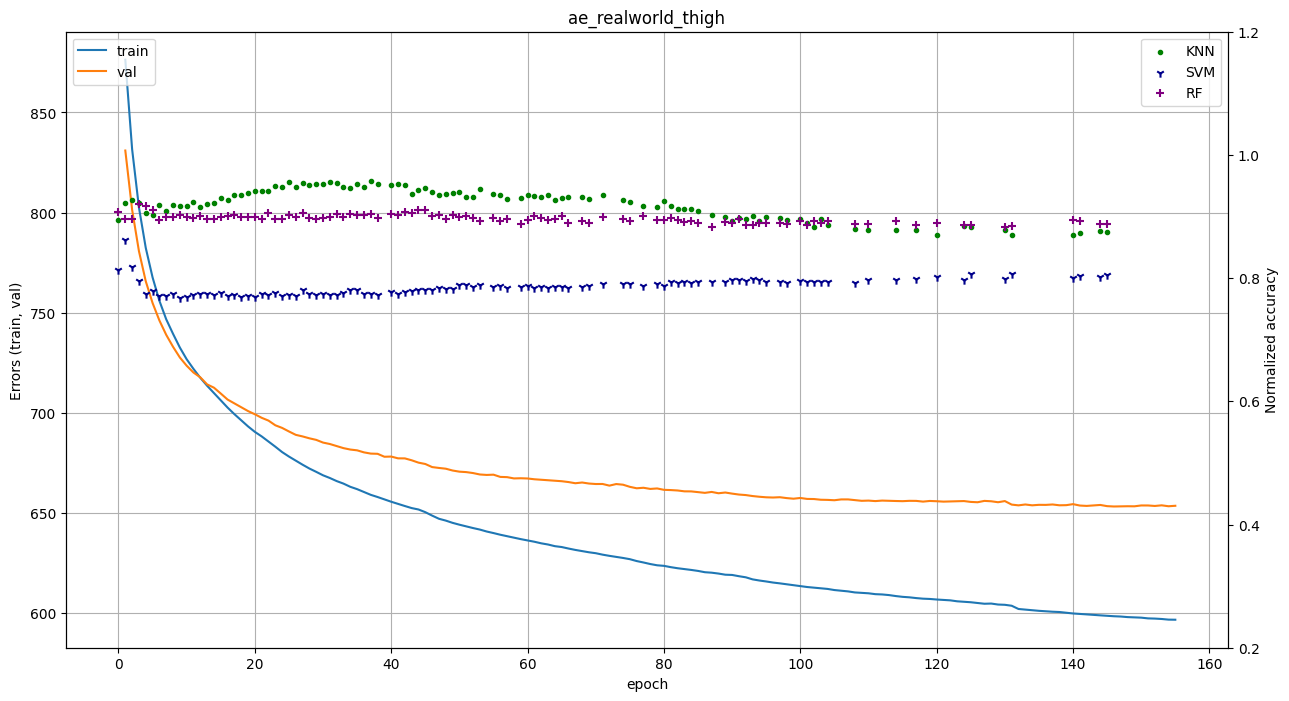

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


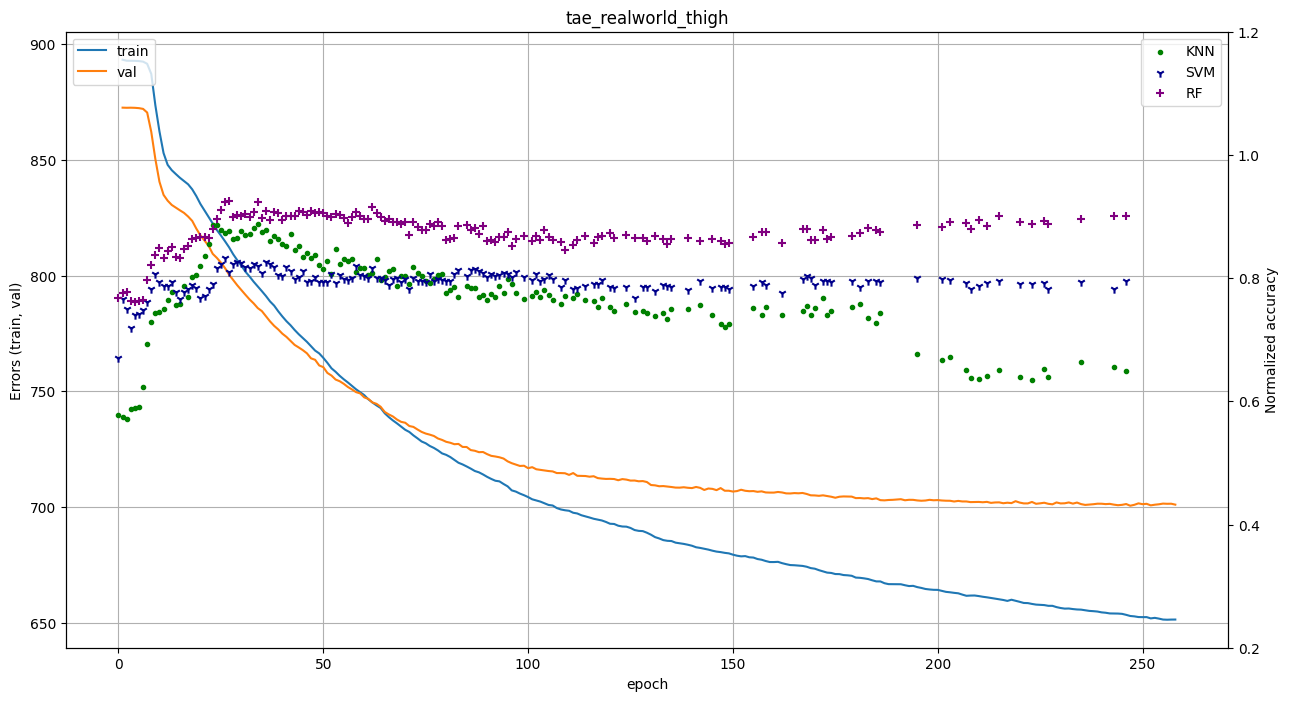

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


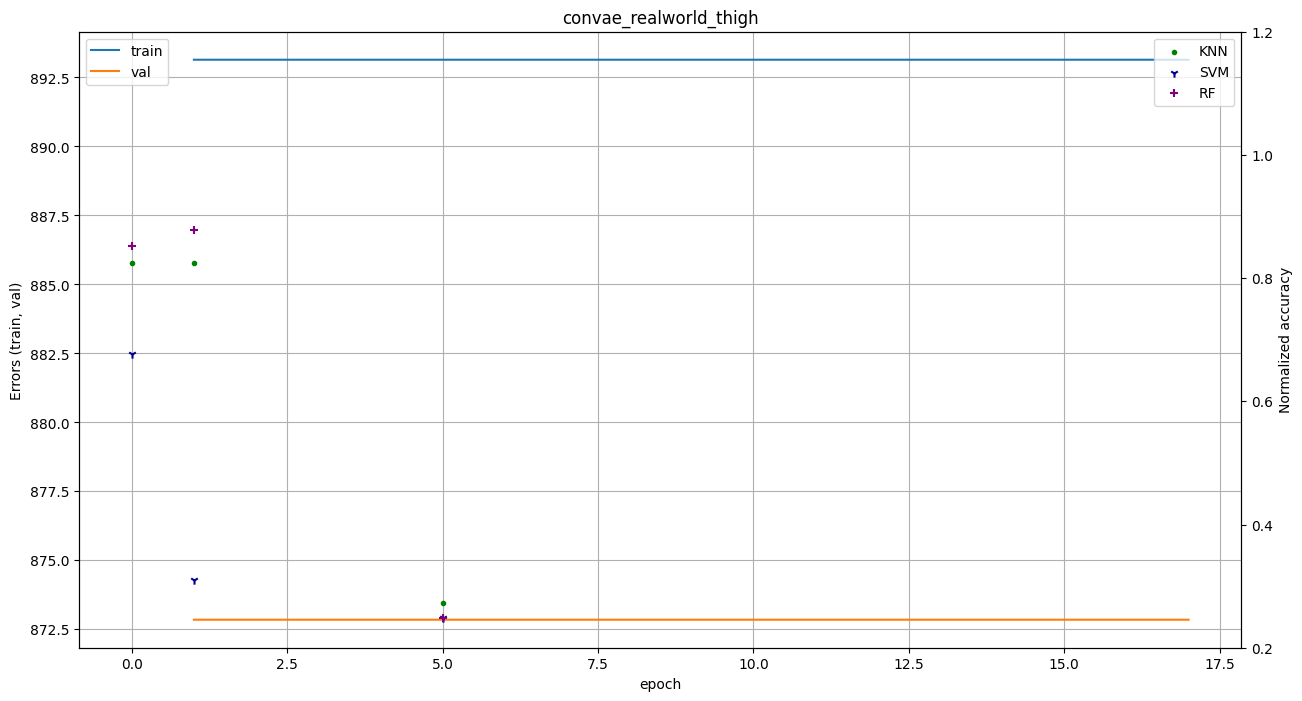

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


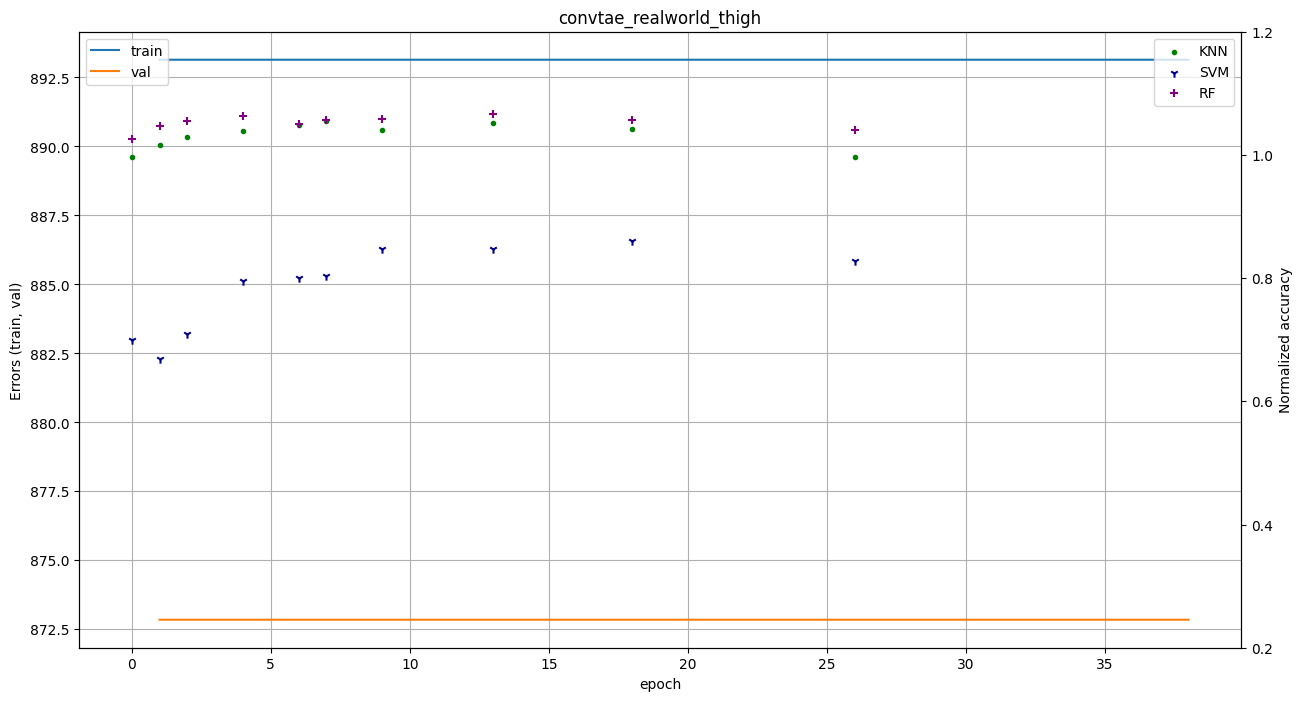

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


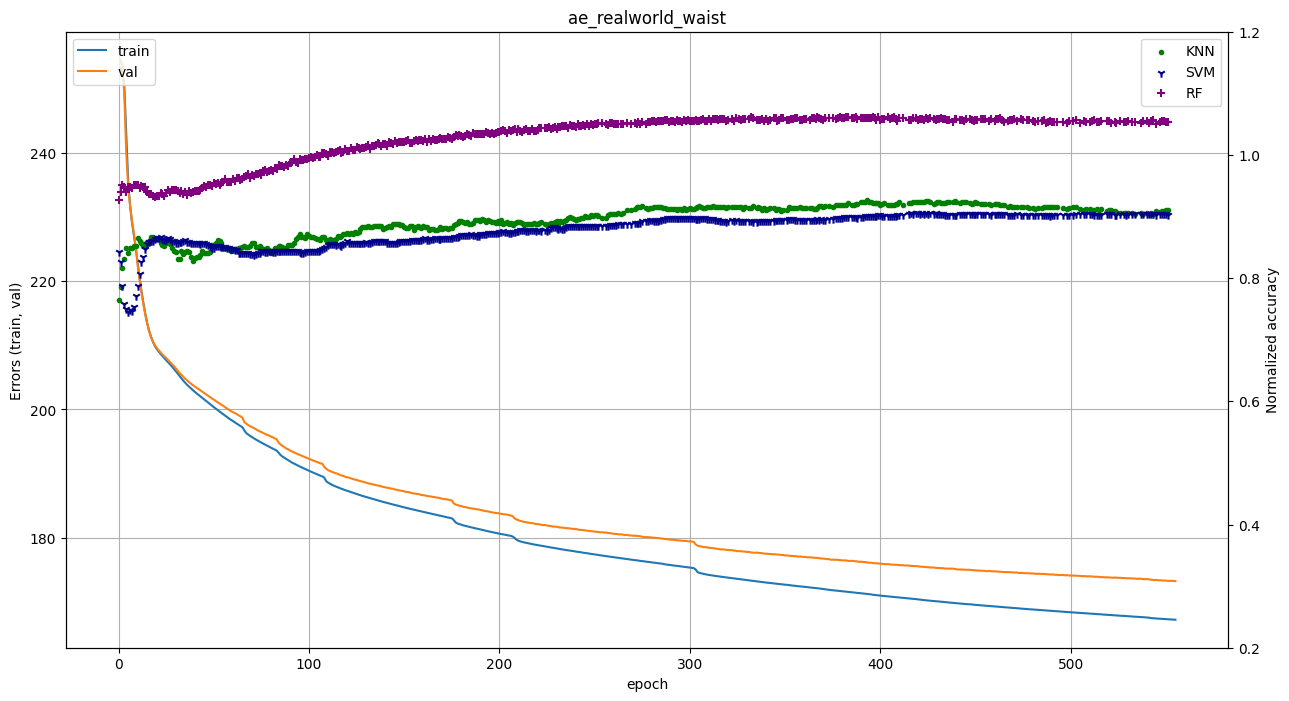

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


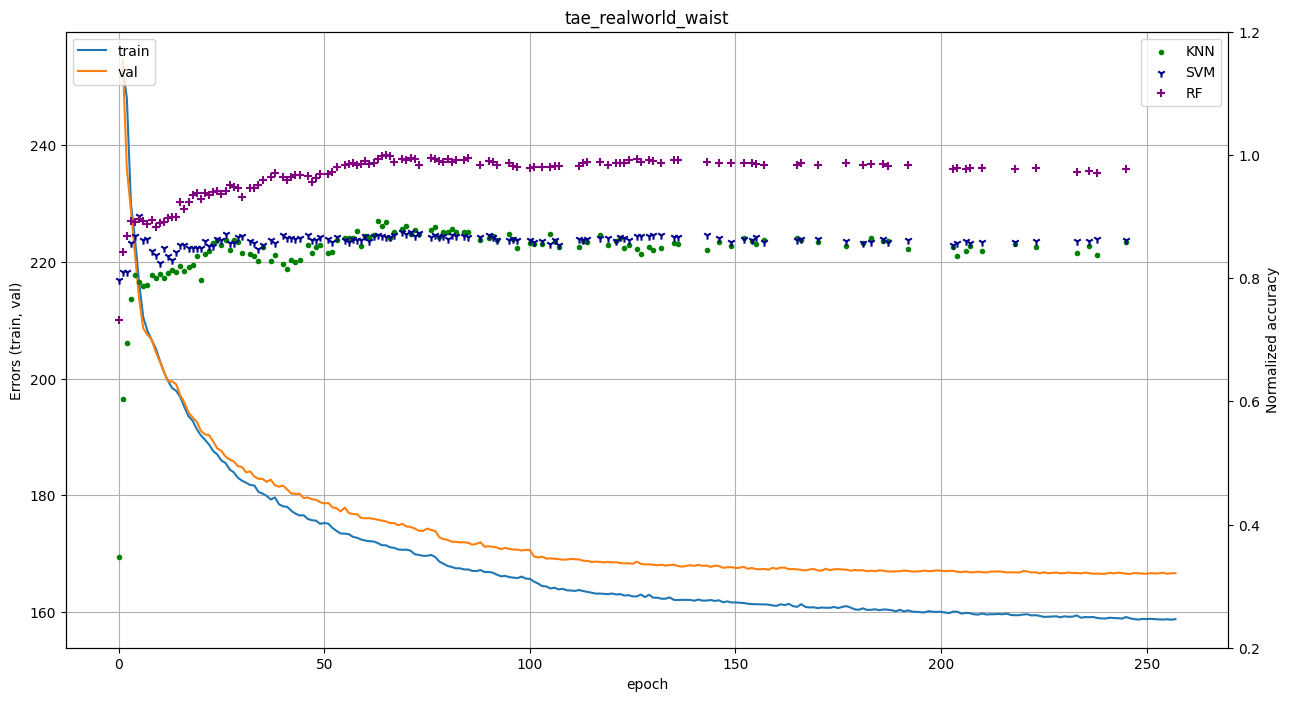

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


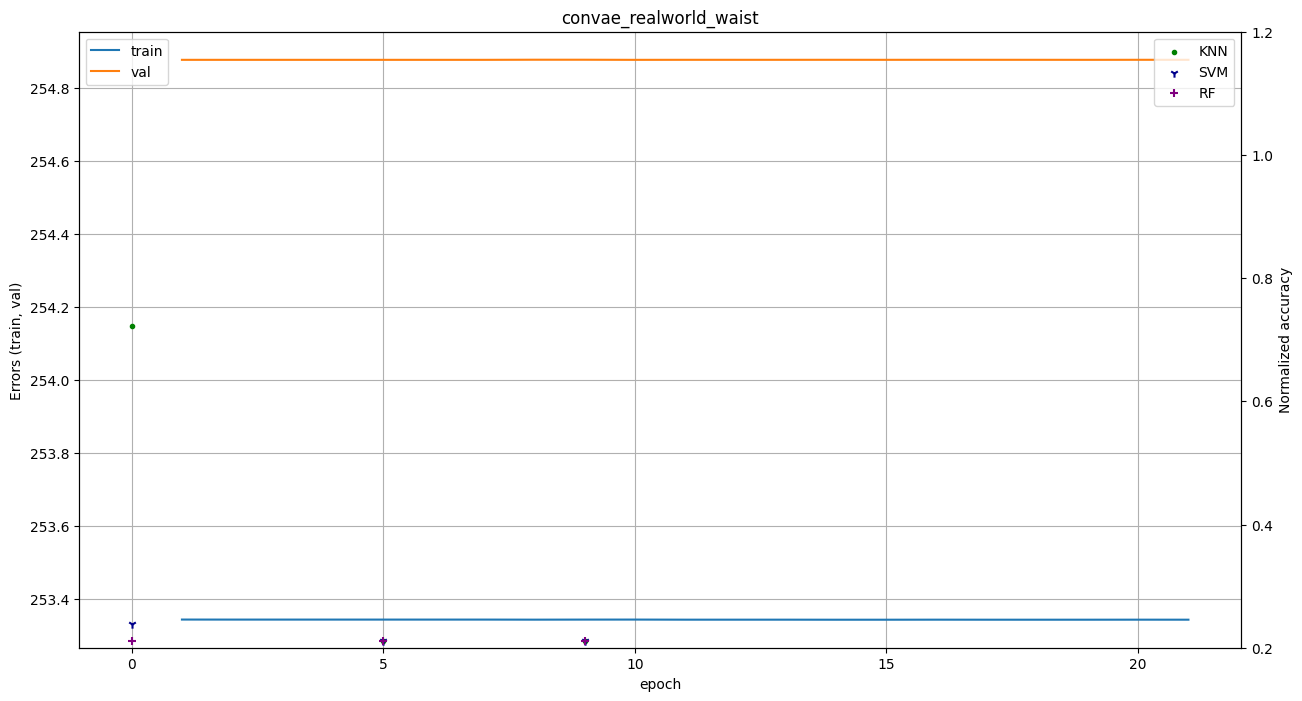

dict_keys(['epoch', 'train_recon_error', 'train_topo_error', 'train_error', 'val_recon_error', 'val_topo_error', 'val_error'])


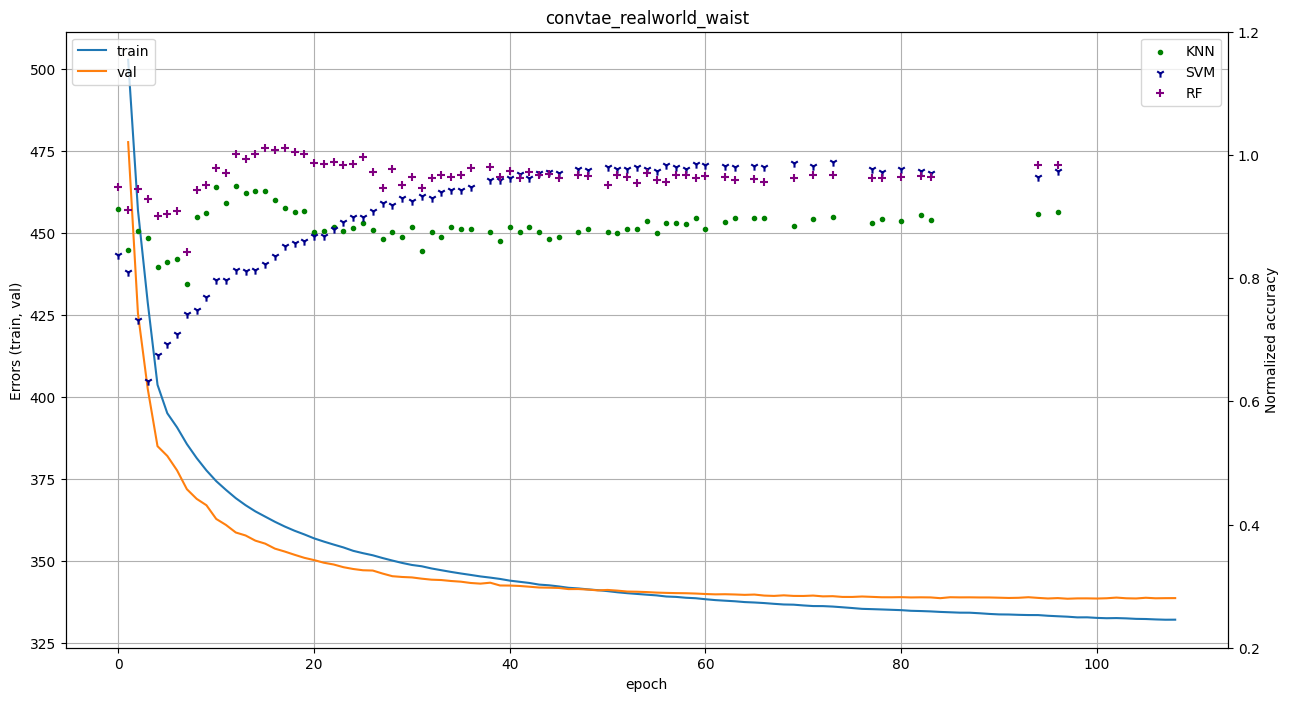

In [52]:
models = ['ae', 'tae', 'convae', 'convtae']
# models = ['ae', 'tae']
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
prefix_list = ['ae_kuhar', 'ae_motionsense', 'ae_uci', 'ae_wisdm']
prefix_list = [f'{model}_{dataset}' for model in models for dataset in datasets]

for dataset in datasets:
    with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        no_reducer_score = yaml.load(f, Loader=yaml.FullLoader)['score']
        # print('DATASET NO REDUCER', no_reducer_score)
    for model in models:
        prefix = f'{model}_{dataset}'
        fig, ax1 = plt.subplots(figsize=(15, 8))
        ax2 = ax1.twinx()
        history_filename = f'../execute_once_experiments/TV_best_ht_saving_checkpoints/files/TV_sb_gradual_{prefix}_25_history.sml'
        with open(history_filename, 'rb') as f:
            history = pickle.load(f)
            print(history.keys())
            ax1.set_title(prefix)
            ax1.plot(history['epoch'], history['train_recon_error'], label='train')
            ax1.plot(history['epoch'], history['val_recon_error'], label='val')
            ax1.legend(loc='upper left')
            ax1.set_xlabel('epoch')
            ax1.set_ylabel('Errors (train, val)')
            # plt.ylim(0, 1)
        data_x = []
        data_knn = []
        data_svm = []
        data_rf = []
        for file in os.listdir(f'../execute_once_experiments/TV_sb_gradual_{prefix}/scores/'):
            epoch = file.split('.')[0].split('_')[-1]    
            with open(f'../execute_once_experiments/TV_sb_gradual_{prefix}/scores/{file}') as f:
                score = yaml.load(f, Loader=yaml.FullLoader)
                # print(score)
                data_x.append(int(epoch))
                data_knn.append(score['KNN-5-accuracy (mean)']/no_reducer_score)
                data_svm.append(score['SVM-rbf-C1.0-accuracy (mean)']/no_reducer_score)
                data_rf.append(score['randomforest-100-accuracy (mean)']/no_reducer_score)
                # ax2.plot(int(epoch), score['score'], 'r.')
        ax2.scatter(data_x, data_knn, color='green', marker='.', label='KNN')
        ax2.scatter(data_x, data_svm, color='darkblue', marker='1', label='SVM')
        ax2.scatter(data_x, data_rf, color='purple', marker='+', label='RF')
        ax2.set_ylim((0.2, 1.2))
        ax2.set_ylabel('Normalized accuracy')
        ax2.legend(loc='upper right')
        ax1.grid()
        plt.show()
        # plt.savefig(f'{prefix}_gradual.png', transparent=True)